# **Exoplanet Expedition**

## What is an Exoplanet?

An **exoplanet** is a planet beyond our solar system. These planets may or may not orbit a star, as Earth orbits the Sun.

They exhibit diverse characteristics, varying in size, composition, and orbital patterns, much like the planets in our own solar system.

## Why is it important?

Exploring exoplanets is essential for understanding the formation and evolution of planets. It broadens our perspective on the potential for life beyond Earth by identifying habitable zones and analyzing planetary atmospheres. It also helps us reflect on Earth's place in universe: are we truly unique? What was the probability of our existence?  

This pursuit fuels human curiosity and inspires technological innovations and scientific advancements, benefiting both space exploration and life on Earth.

### Types of Exoplanets

Exoplanets can be categorized by their appearence and composition. Some common types include:

1. **Hot Jupiters**: These are gas giants similar to Jupiter but orbiting very close to their stars, resulting in extremely high surface temperatures.

2. **Super-Earths**: As the name suggests, these planets are larger than Earth but smaller than Uranus or Neptune. They can be rocky or gaseous and may be located in the habitable zone of their stars.

3. **Neptune-like Planets**: These planets are similar in size to Neptune and are usually composed of gas and ice, often located far from their stars.

  *   **Hot Neptunes** are a type of exoplanet that are similar in size to Neptune but orbit very close to their stars, leading to high surface temperatures.
  *   **Mini-Neptunes** are smaller than Neptune but still have thick atmospheres composed of hydrogen and heloum, often lacking a solid surface.

4. **Earth-like Planets**: These are rocky planets with conditions that could potentially support liquid water, similar to Earth. They are often located in the "habitable zone" where temperatures allow for water to exist in liquid form.

5. **Ice Giants**: These planets are mainly composed of water, ammonia, and methane ice, and are usually found far from their stars.

## Present Missions

### Kepler

The Kepler Space Telescope was designed to discover Earth-like exoplanets by continuously monitoring a single region of the sky for four years. This long-term observation allowed Kepler to identify small planets with long orbital periods, some within their star’s habitable zone. Its discoveries revolutionized our understanding of planetary systems, revealing that Earth-sized planets are common in the galaxy.

### TESS

The Transiting Exoplanet Survey Satellite (TESS) took a different approach by surveying nearly the entire sky, focusing on different sectors for about 27 days each. This strategy allowed TESS to map a vast stellar population and detect exoplanets orbiting bright, nearby stars. Unlike Kepler, TESS was optimized to find larger planets with shorter orbital periods, making its discoveries ideal for follow-up studies. Its broad coverage has expanded our catalog of exoplanets and enabled the study of planetary atmospheres and compositions.

## Transit Method for Exoplanet Detection

The transit method is one of the most effective techniques for detecting exoplanets. It involves observing the periodic dimming of a star’s brightness when a planet passes in front of it from our perspective. This temporary dip in light, known as a transit, provides crucial information about the planet’s size, orbit, and even atmospheric composition.

## Your Mission

In this mini project, you will choose a dataset from the Transiting Exoplanet Survey Satellite (TESS) mission that interests you. Your goal is to analyze the data to identify potential exoplanets. Once you've confirmed the presence of an exoplanet, you'll dive deeper into its characteristics, exploring aspects of the planet such as its size, orbit, and mass.


> **Before you proceed, save a copy in your drive. DO NOT edit this notebook.**


### Select a TIC ID

To find a TIC ID, follow these steps:

1. Go to [MAST](https://mast.stsci.edu/portal/Mashup/Clients/Mast/Portal.html).
2. Under Select a Collection, choose MAST Catalogs.
3. Under Mission, select either TESS Input v8.2 or TESS CTL v8.01, then click Advanced Search.
4. You can filter the datasets by constraining host star characteristics like distance (pc) and temperature. After adjusting your parameters, click Search.
5. A list of TIC IDs will appear for stars within your selected parameters.

To check for confirmed or candidate exoplanets for a given TIC ID, go to [EXOFOP](https://exofop.ipac.caltech.edu/tess/) and enter your TIC ID. If you find any potential exoplanets listed, you can proceed with your analysis. If no planets are found, you can still proceed, though your further analysis may be impacted.

### Plot a Lightcurve using *lightkurve*

The Lightkurve package is a Python library designed to simplify the analysis of time-series data, particularly focusing on data from the Kepler and TESS missions.

For more information, check out [Lightkurve documentation](https://lightkurve.github.io/lightkurve/).



In [ ]:
!pip install lightkurve

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.2/41.2 kB 1.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 270.4/270.4 kB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.1/11.1 MB 65.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.5/184.5 kB 13.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.3/78.3 kB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 997.6/997.6 kB 32.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.4/13.4 MB 63.9 MB/s eta 0:00:00
  Created wheel for fbpca: filename=fbpca-1.0-py3-none-any.whl size=11373 sha256=5e5992aed897447fb5f1811af866d62baa6eb18182f78a613a33f32f80d44385
  Stored in directory: /root/.cache/pip/wheels/71/ae/f7/5b7e1e16a133d094431428169e9a8d9f750afe5

In [ ]:
# Import required packages
import lightkurve as lk
import matplotlib.pyplot as plt
import numpy as np
from astropy.time import Time

In [ ]:
TIC = 'TIC 287196418' # Input TIC ID ~ Example - TIC 284475976
all_data = lk.search_lightcurve(TIC, author='SPOC') # Only use SPOC
print(all_data)


SearchResult containing 31 data products.

 #     mission     year author exptime target_name distance
                                  s                 arcsec 
--- -------------- ---- ------ ------- ----------- --------
  0 TESS Sector 14 2019   SPOC     120   287196418      0.0
  1 TESS Sector 16 2019   SPOC     120   287196418      0.0
  2 TESS Sector 17 2019   SPOC     120   287196418      0.0
  3 TESS Sector 21 2020   SPOC     120   287196418      0.0
  4 TESS Sector 26 2020   SPOC     120   287196418      0.0
  5 TESS Sector 40 2021   SPOC     120   287196418      0.0
  6 TESS Sector 41 2021   SPOC     120   287196418      0.0
  7 TESS Sector 47 2021   SPOC     120   287196418      0.0
  8 TESS Sector 60 2022   SPOC     120   287196418      0.0
  9 TESS Sector 59 2022   SPOC     120   287196418      0.0
 10 TESS Sector 58 2022   SPOC     120   287196418      0.0
 11 TESS Sector 56 2022   SPOC     120   287196418      0.0
 12 TESS Sector 55 2022   SPOC     120   287196418      0

In [ ]:
all_data = all_data[0:1] # Only use first two datasets
sample_data = all_data.download_all().stitch() # Combine and normalize
print(all_data)

SearchResult containing 1 data products.

 #     mission     year author exptime target_name distance
                                  s                 arcsec 
--- -------------- ---- ------ ------- ----------- --------
  0 TESS Sector 14 2019   SPOC     120   287196418      0.0


<Axes: xlabel='Time - 2457000 [BTJD days]', ylabel='Normalized Flux'>

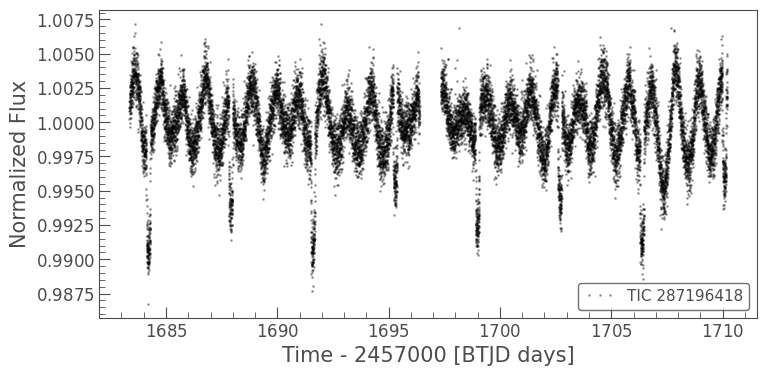

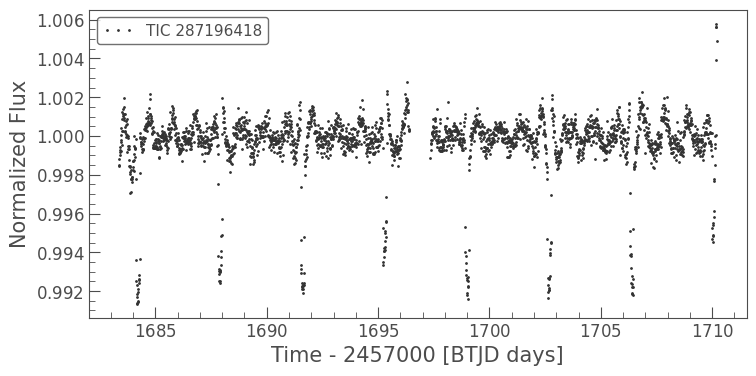

In [ ]:
# Downsample
sample_data.plot(linewidth=0, marker='.', color='k', alpha=0.3)
bin_time =  15/60/24 # Input a number in days
sample_data_bin = sample_data.bin(bin_time)
flat_sample_data = sample_data_bin.flatten()
flat_sample_data.plot(linewidth=0, marker='.')

<Axes: xlabel='Period [$\\mathrm{d}$]', ylabel='BLS Power'>

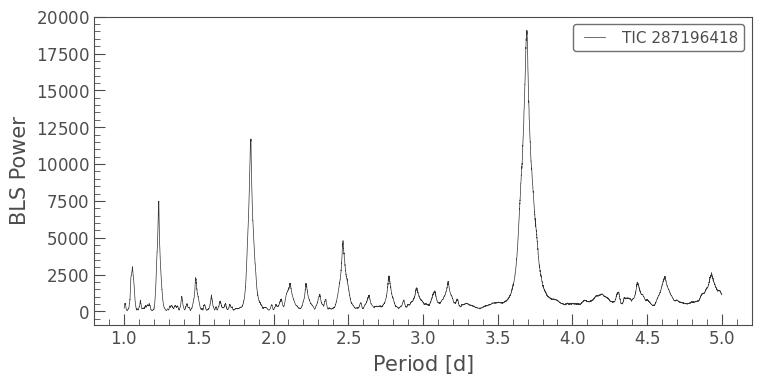

In [ ]:
# Box least squares
period = np.linspace(1,5, 10000)

bls = flat_sample_data.to_periodogram(method='bls',period=period, frequency_factor=500)
bls.plot()

Period: 3.6958695869586955 d
t0: 1684.2050907058335
Duration: 0.15 d


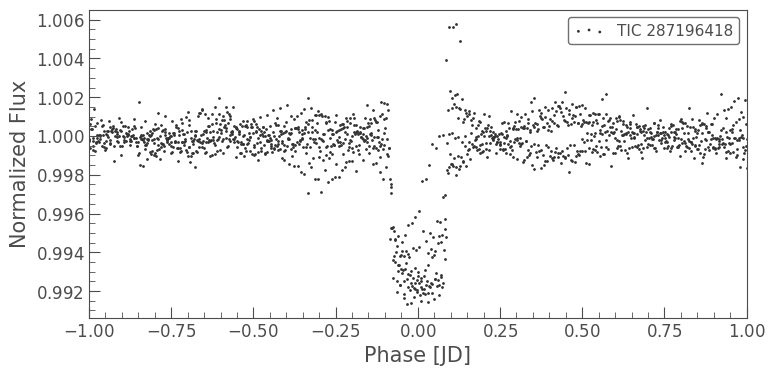

In [ ]:
# Phase folding
planet_period = bls.period_at_max_power
planet_t0 = bls.transit_time_at_max_power
planet_duration = bls.duration_at_max_power

ax = flat_sample_data.fold(period=planet_period, epoch_time=planet_t0).scatter()
ax.set_xlim(-1, 1)

print('Period:', planet_period) # How often the transit occurs
print('t0:', planet_t0)
print('Duration:', planet_duration) # How long the transit lasts

### Detect False Positives

Occasionally, a light curve may exhibit transit-like characteristics that suggest the presence of an exoplanet. However, other background anomalies might be responsible for these patterns. To evaluate your data for potential false positives, we will analyze the background flux and look for any unusual or inconsistent patterns that could indicate non-planetary causes, such as stellar activity, instrumental noise, or eclipsing binaries.

/usr/local/lib/python3.11/dist-packages/lightkurve/search.py:424: LightkurveWarning: Warning: 2 files available to download. Only the first file has been downloaded. Please use `download_all()` or specify additional criteria (e.g. quarter, campaign, or sector) to limit your search.
  warnings.warn(


<Axes: title={'center': 'Target ID: 287196418, Cadence: 328247'}, xlabel='Pixel Column Number', ylabel='Pixel Row Number'>

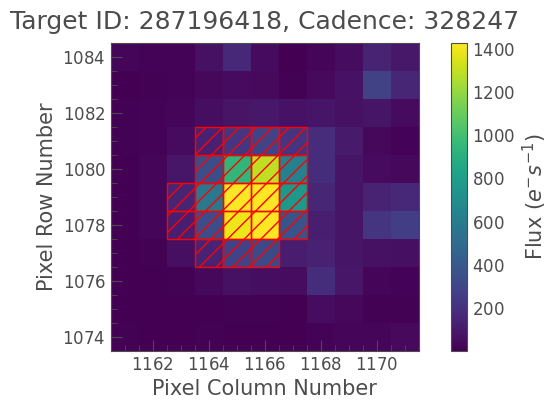

In [ ]:
# Target Pixel File
tp_data =  lk.search_targetpixelfile(TIC, author='SPOC')
tp_data = tp_data[0:2]
tp_sample = tp_data.download()
tp_sample.plot(aperture_mask = 'pipeline')

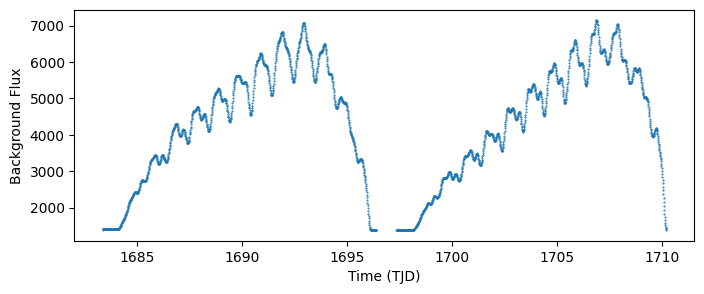

In [ ]:
# Plot Background Flux
fig, ax = plt.subplots(figsize = (8,3))

plt.plot(flat_sample_data.time.value, flat_sample_data.sap_bkg.value, lw=0, marker = '.', ms=1)
plt.ylabel('Background Flux')
plt.xlabel('Time (TJD)') # TESS Julian Date
plt.show()

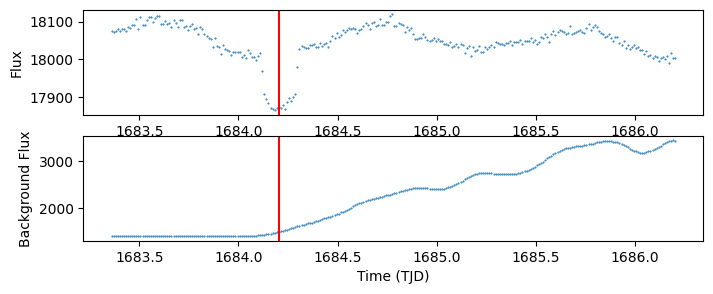

In [ ]:
# Compare Target Flux with Background Flux
planet_t0_float = planet_t0.value

mask = (flat_sample_data.time.value > planet_t0_float - 2) & (flat_sample_data.time.value < planet_t0_float + 2)

fig, ax = plt.subplots(nrows=2, figsize=(8, 3))

ax[0].plot(flat_sample_data.time.value[mask], flat_sample_data.sap_flux.value[mask], lw=0, marker='.', ms=1)
ax[1].plot(flat_sample_data.time.value[mask], flat_sample_data.sap_bkg.value[mask], lw=0, marker='.', ms=1)

ax[0].axvline(planet_t0_float, color='r')
ax[1].axvline(planet_t0_float, color='r')

ax[0].set_ylabel('Flux')
ax[1].set_ylabel('Background Flux')
ax[1].set_xlabel('Time (TJD)')
plt.show()

### Determine Planet Radius

Along with the various system properties that can be derived from the light curve, an essential task is determining the radius of the planet candidate. To achieve this, you can assume the radius of the host star is known and use the equation below to calculate the planet's radius manually.


$$ A_{pl} = \pi R_{pl}^2 $$  
$$ A_* = \pi R_*^2 $$  
$$ T_D = \left(\frac{R_{pl}}{R_*}\right)^2 $$  
$$ R_{pl} = R_* \sqrt{T_D} $$

Here $T_D$ is the transit depth, which can be found by visually assessing your light curve.


In [ ]:
# Import required packages
import astropy.units as u
from astropy.constants import G

In [ ]:
# Find Transit Depth
min_depth =  # Input guess
ax = flat_sample_data.fold(period=planet_period, epoch_time=planet_t0).scatter()
ax.axhline(min_depth, color='r')
ax.set_xlim(-1, 1)

Go back to [EXOFOP](https://exofop.ipac.caltech.edu/tess/) and input your TIC ID. Look under "Stellar Parameters" for R_Sun.

In [ ]:
# Calculate Radius
known_R_star =  # Input known star radius in solar radii
transit_depth = 1 - min_depth
R_star = known_R_star * u.Rsun

r_pl_solar_radius = np.sqrt(transit_depth) * R_star
r_pl_earth_radius = r_pl_solar_radius.to(u.Rearth)
print(r_pl_earth_radius)